In [2]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv(r"../data/model_ready_data.csv", parse_dates=['date'])

In [38]:
# Split data into train and test sets (80-20 split)
train_size = int(len(df) * 0.8)
train, test = df['price_diff'].iloc[:train_size], df['price_diff'].iloc[train_size:]

In [40]:
# Fit ARIMA model
# Start with (1,1,1) as baseline - we'll optimize later
arima_model = ARIMA(train, order=(0,1,0))
arima_fit = arima_model.fit()

# Display model summary
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             price_diff   No. Observations:                 1168
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -323.561
Date:                Tue, 12 Aug 2025   AIC                            649.122
Time:                        00:17:31   BIC                            654.184
Sample:                             0   HQIC                           651.031
                               - 1168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1006      0.001     78.412      0.000       0.098       0.103
Ljung-Box (L1) (Q):                 393.41   Jarque-Bera (JB):             18037.14
Prob(Q):                              0.00   Pr

In [42]:
# Make predictions
arima_forecast = arima_fit.forecast(steps=len(test))

In [44]:
# Calculate evaluation metrics
arima_mse = mean_squared_error(test, arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(test, arima_forecast)

print(f"\nARIMA Model Performance:")
print(f"MSE: {arima_mse:.4f}")
print(f"RMSE: {arima_rmse:.4f}")
print(f"MAE: {arima_mae:.4f}")


ARIMA Model Performance:
MSE: 0.0185
RMSE: 0.1360
MAE: 0.0881


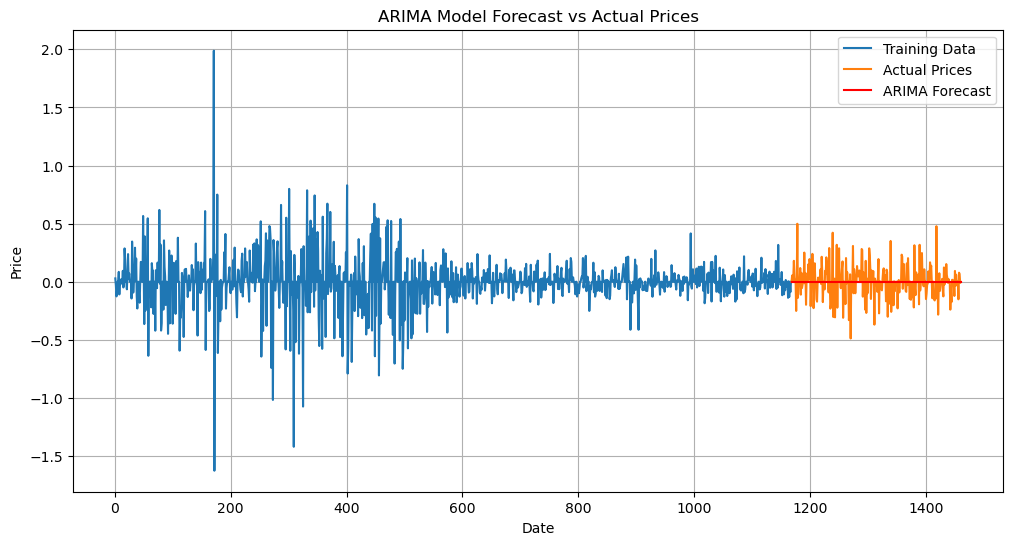

In [46]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Prices')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()